In [1]:
#import Libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\User\AppData\Local\Temp\ipykernel_336\610210417.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


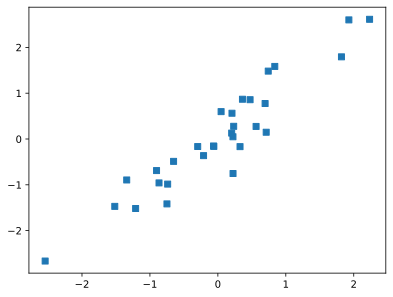

In [3]:
#create data
N=30
x=torch.randn(N,1)
y=x+torch.randn(N,1)/2

#plot
plt.plot(x,y,'s')
plt.show()

In [6]:
# Build Model
ANNreg= nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [7]:
#learning Rate
learningRate = 0.05

#Loss Function
lossfun = nn.MSELoss()

#optimizer (the flavor of Grdient descent)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [9]:
#train the model
numepochs = 500
losses = torch.zeros(numepochs)

##actual trainning 
for epochi in range(numepochs):

    #forward pass
    yHat=ANNreg(x)

    #compute loss
    loss = lossfun(yHat,y)
    losses[epochi]=loss

    #backdrop
    optimizer.zero_grad() #make initially zero for graident descent
    loss.backward() #do the back propagation
    optimizer.step() #using optimizer in every step

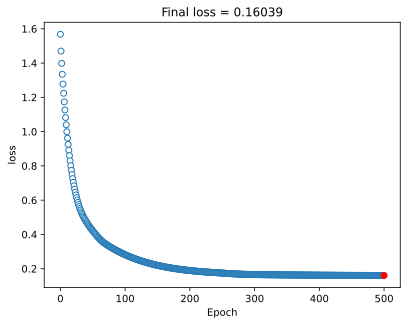

In [10]:
#manually compute losses 
#final forward pass
prediction = ANNreg(x)

#final loss MSE
testloss= (prediction-y).pow(2).mean()


plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=0.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [12]:
testloss
#it has an attached gradient descent 
#thats why it is used with .detach()
testloss.detach()

tensor(0.1604)

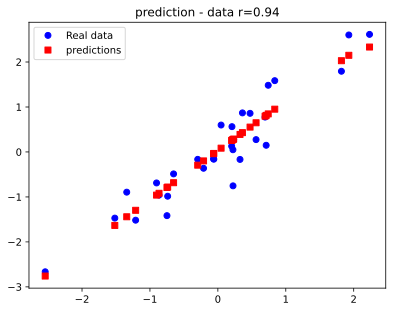

In [13]:
#plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,prediction.detach(),'rs',label='predictions')
plt.title(f'prediction - data r={np.corrcoef(y.T,prediction.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

In [17]:
np.corrcoef(y.T,prediction.detach().T)[0,1]

0.9413771995516584

In [19]:
print(f'prediction - data r = {np.corrcoef(y.T,prediction.detach().T)[0,1]:.3f}')

prediction - data r = 0.941
